# Проект по моделям обучения с учителем, задача классификации. Отток клиентов.

**Цель:** создать модель предсказания того, уйдет ли клиент в отток.

Датасет и описание данных взято [отсюда](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data)

* 'customerID' - ID клиента
* 'gender' - пол (Female, Male)
* 'SeniorCitizen' - является ли клиент пожилым человеком или нет (1, 0)
* 'Partner' - есть ли у клиента партнер или нет (Yes, No)
* 'Dependents' - Есть ли у клиента иждивенцы или нет (Yes, No)
* 'tenure' - длительность обслуживания (количество месяцев, в течение которых человек был клиентом компании)
* 'PhoneService' - пользуется ли телефонной связью (Yes, No)
* 'MultipleLines' - пользуется multiple lines (Yes, No, No phone service)
* 'InternetService' - интернет-провайдер клиента (DSL, Fiber optic, No)
* 'OnlineSecurity' - пользуется ли онлайн безопасностью (Yes, No, No internet service)
* 'OnlineBackup' - пользуется ли резервным копированием (Yes, No, No internet service)
* 'DeviceProtection' - есть ли у клиента защита устройства (Yes, No, No internet service)
* 'TechSupport' - пользуется ли тех. поддержкой (Yes, No, No internet service)
* 'StreamingTV' - пользуется ли стримингом TV (Yes, No, No internet service)
* 'StreamingMovies' - пользуется ли стримингом фильмов (Yes, No, No internet service)
* 'Contract' - тип срока контракта (Month-to-month, One year, Two year)
* 'PaperlessBilling' - есть ли Paperless Billing (Yes, No)
* 'PaymentMethod' - способ оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* 'MonthlyCharges' - сумма ежемесячной оплаты
* 'TotalCharges' - общая сумма, списанная с клиента
* 'Churn' - ушел ли в отток (Yes or No)
---

Все признаки можно разделить в группы:
- сервисы, на которые подписан клиент: phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- информация об аккаунте: how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- демографическая информация о клиенте: gender, age range, and if they have partners and dependents

## EDA и анализ оттока

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**В датафрейме пропусков нет. Большинство колонок - категориальные, их нужно будет закодировать.**

In [9]:
df.duplicated(subset=['customerID']).sum()

0

**Дубликатов в датасете тоже нет, по крайней мере, ID-шки уникальные.**

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


**Заметим, что колонка 'SeniorCitizen' - категориальная.**

In [13]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7032,7032,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7032,2,Male,3549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7032.0,NaN,NaN,NaN,0.1624,0.368844,0.0,0.0,0.0,0.0,1.0
Partner,7032,2,No,3639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7032,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7032.0,NaN,NaN,NaN,32.421786,24.54526,1.0,9.0,29.0,55.0,72.0
PhoneService,7032,2,Yes,6352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7032,3,No,3385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7032,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7032,3,No,3497,NaN,NaN,NaN,NaN,NaN,NaN,NaN


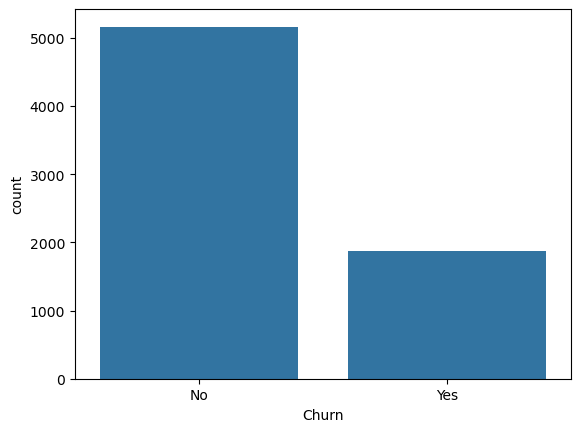

In [15]:
sns.countplot(x=df['Churn']);

**Классы немного несбалансированны - клиентов, ушедших в отток, менее трети в данных. При построении моделей это нужно будет учесть.**

**Посмотрим на ежемесячные траты тех, кто ушел в отток, и тех, кто остался.**

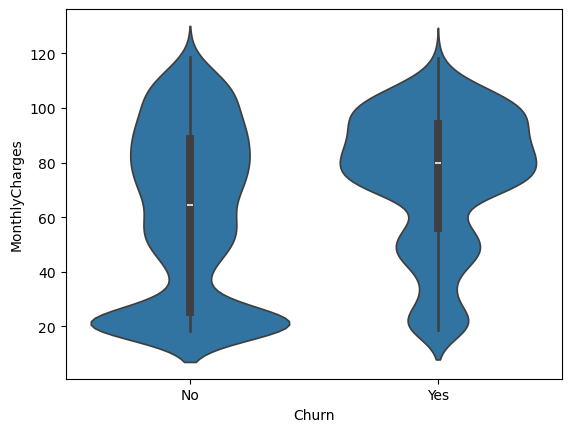

In [17]:
sns.violinplot(data=df, x='Churn', y='MonthlyCharges');

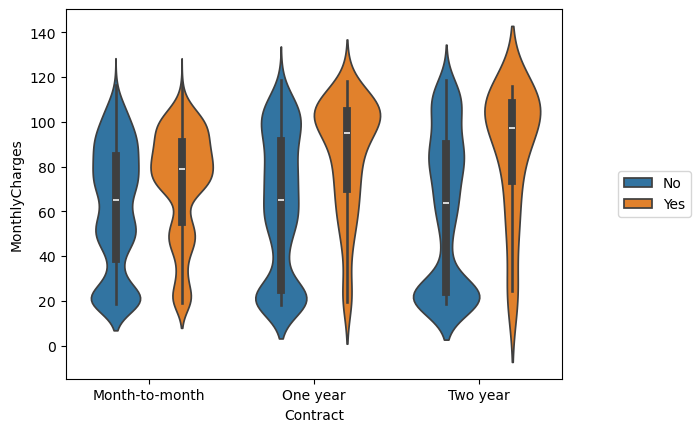

In [19]:
sns.violinplot(data=df, x='Contract', y='MonthlyCharges', hue='Churn')
plt.legend(loc=6, bbox_to_anchor=(1.1, 0.5));

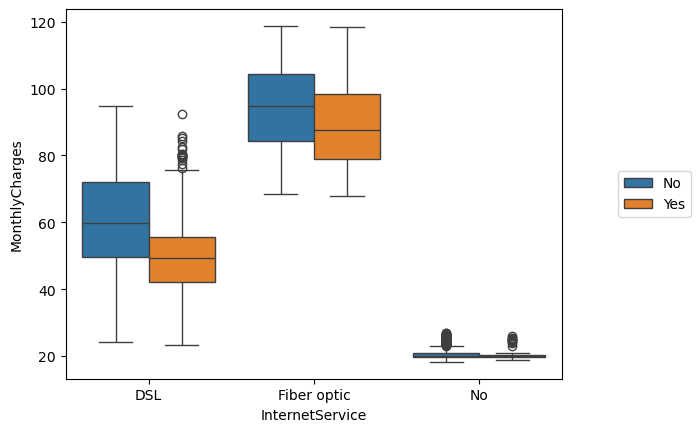

In [21]:
sns.boxplot(data=df, x='InternetService', y='MonthlyCharges', hue='Churn')
plt.legend(loc=6, bbox_to_anchor=(1.1, 0.5));

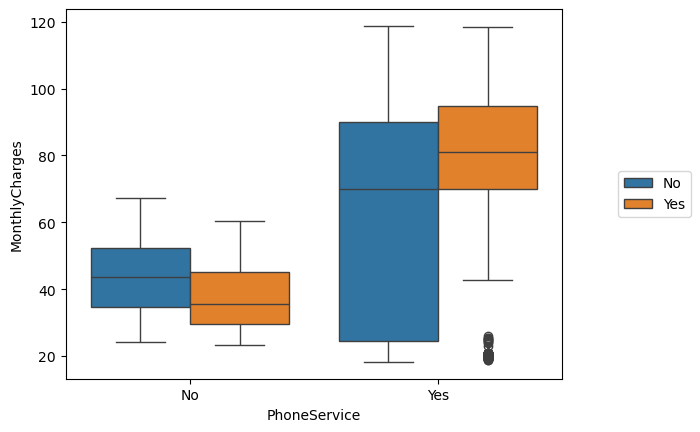

In [23]:
sns.boxplot(data=df, x='PhoneService', y='MonthlyCharges', hue='Churn')
plt.legend(loc=6, bbox_to_anchor=(1.1, 0.5));

**Заметим, что в отток уходят те, кто в среднем платит больше, независимо от типа контракта. Поэтому с помощью предиктивной модели мы можем определить клиентов, которые могут уйти в отток, и предложить им индивидуальные скидки на тарифы. Так мы не потеряет клиентов и в долгосрочной перспективе увеличим прибыль.**

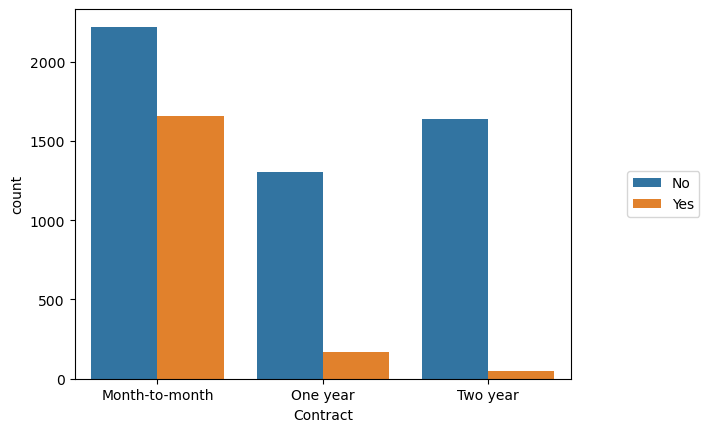

In [25]:
sns.countplot(data=df, x='Contract', hue='Churn')
plt.legend(loc=6, bbox_to_anchor=(1.1, 0.5));

**В отток уходят преимущественно те, кто пользуется месячным контрактом. Возможно, после нескольких месяцев обслуживания они понимают, что условия тарифов и/или цены их не удовлетворяют, и они уходят к конкурентам.**

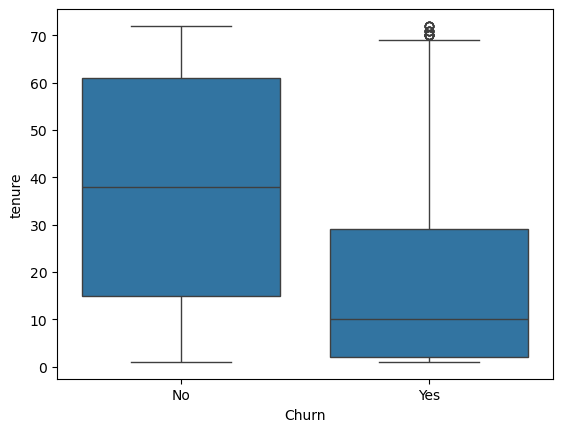

In [27]:
sns.boxplot(data=df, x='Churn', y='tenure');

**В отток уходят клиенты, попользовавшиеся услугами 1-2 года. Клиенты, пользующиеся услугами длительное время, вероятнее всего довольны предоставляемыми услугами и тратами на них, поэтому остаются лояльными клиентами компании.**

### Анализ оттока в когортах

**Сегментируем клиентов на когорты в зависимости от длительности обслуживания (признак _tenure_) и исследуем, как отток клиентов зависит от этого признака.**

Выше мы уже обнаружили, что в основном в отток уходят те, кто платит больше денег в месяц, а также те, кто пользовался услугами около года. Проанализируем отток немного подробнее, сегментировав людей на когорты.

**Прежде всего посмотрим на график оттока клиентов в зависимости времени обслуживания (tenure).**

In [29]:
df['tenure'].describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [31]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

churn_rate = df.groupby('tenure')['Churn'].agg(['count', 'sum'])
churn_rate

,count,sum
tenure,,
1,613,380
2,238,123
3,200,94
4,176,83
5,133,64
...,...,...
68,100,9
69,95,8
70,119,11


In [33]:
churn_percentage = churn_rate['sum'] * 100 / churn_rate['count']

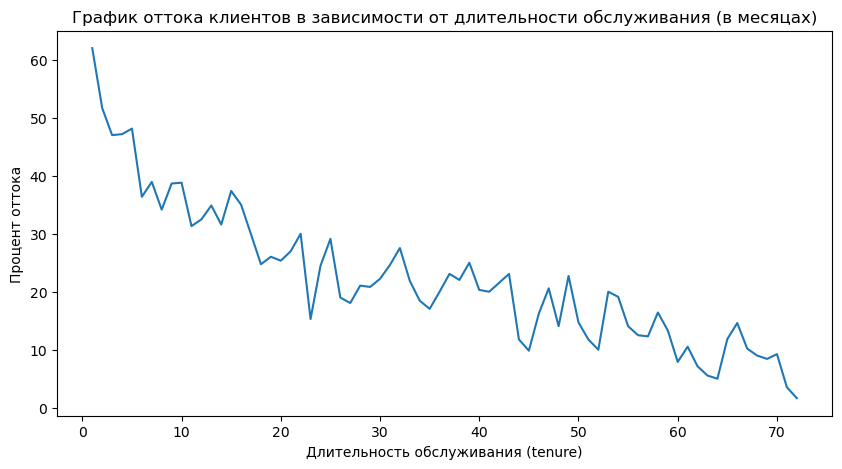

In [35]:
plt.figure(figsize=(10, 5))
churn_percentage.plot()
plt.xlabel('Длительность обслуживания (tenure)')
plt.ylabel('Процент оттока')
plt.title('График оттока клиентов в зависимости от длительности обслуживания (в месяцах)');

**Естественно, процент оттока выше всего в первые месяцы пользования услугами компании, то есть у новых клиентов.**

**Создадим когорты по времени обслуживания:**
- до года
- 1-2 года
- 2-4 года
- более 4 лет

In [37]:
def cohort(tenure):
    if tenure <= 12:
        return '0-12 месяцев'
    elif tenure <= 24:
        return '13-24 месяцев'
    elif tenure <= 48:
        return '25-48 месяцев'
    else:
        return 'более 48 месяцев'

In [39]:
df['TenureCohort'] = df['tenure'].apply(cohort)

In [41]:
df[['tenure','TenureCohort']]

,tenure,TenureCohort
0,1,0-12 месяцев
1,34,25-48 месяцев
2,2,0-12 месяцев
3,45,25-48 месяцев
4,2,0-12 месяцев
...,...,...
7027,24,13-24 месяцев
7028,72,более 48 месяцев
7029,11,0-12 месяцев
7030,4,0-12 месяцев


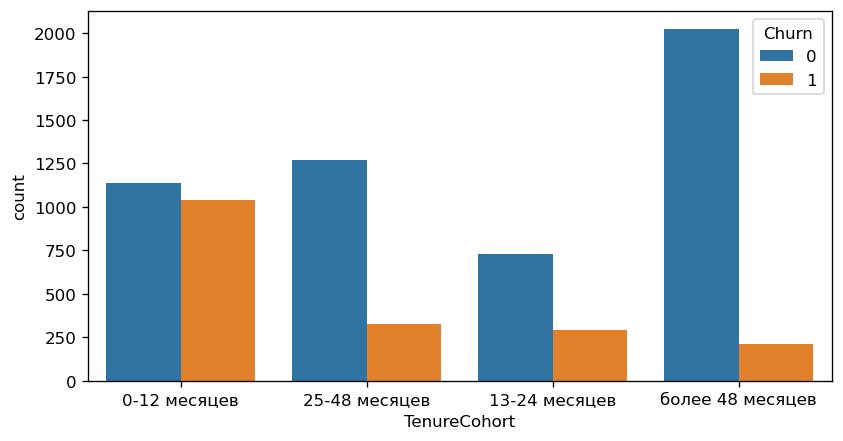

In [43]:
plt.figure(figsize=(8, 4), dpi=120)
sns.countplot(data=df, x='TenureCohort', hue='Churn');

<Figure size 2000x800 with 0 Axes>

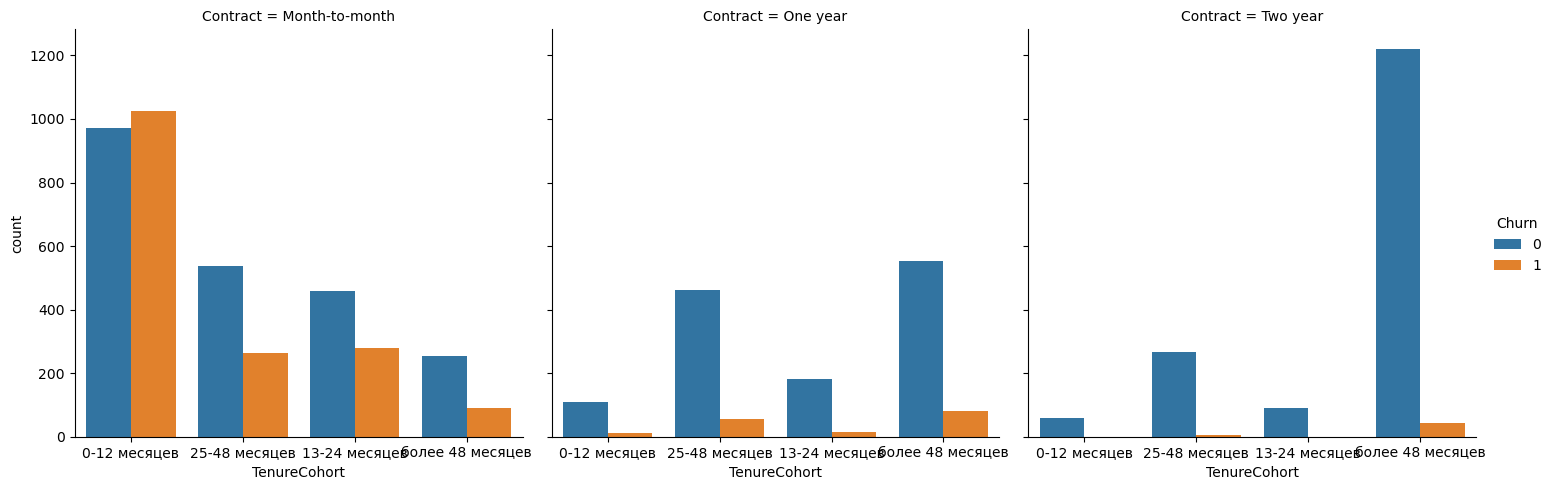

In [45]:
plt.figure(figsize=(10, 4), dpi=200)
sns.catplot(data=df, x='TenureCohort', hue='Churn', col='Contract', kind='count');

**Клиенты с длительностью обслуживания более 48 месяцев редко уходят в отток. А чаще уходят в отток те, кто попользовался услугами меньше года. Для удержания клиентов следует сосредоточиться на них.**

**Заметим также, что клиенты с одномесячными конрактами заметно чаще уходят в отток, независимо от длительности обслуживания в компании.**

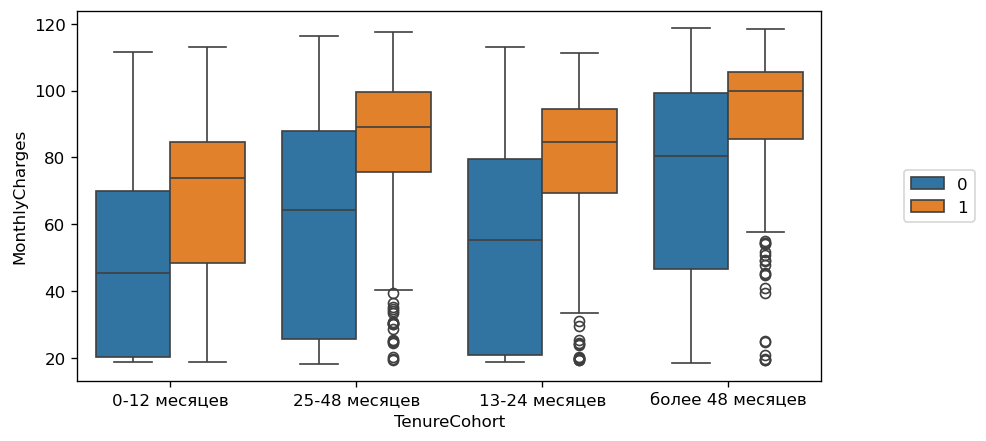

In [47]:
plt.figure(figsize=(8, 4), dpi=120)
sns.boxplot(data=df, x='TenureCohort', y='MonthlyCharges', hue='Churn')
plt.legend(loc=6, bbox_to_anchor=(1.1, 0.5));

**Также, независимо от времени обслуживания, клиенты, уходящие в отток, платят значительно больше, чем те, кто остается в компании.**

#### **Вывод по анализу оттока**

Компания теряет клиентов, которые имеют следующие признаки:

* новые клиенты, получающие услуги компании меньше года;
* клиенты с одномесячным контрактом, которые могут заключать такой тип контракта "на пробу", чтобы понять удовлетворяет их компания или нет;
* независимо от типа контракта и времени обслуживания в компании, уходят в отток те, кто в среднем платит больше.

## Кодирование категориальных переменных, корреляция

**Удалим колонку с ID, закодируем категориальные переменные, а затем посмотрим на корреляцию признаков и целевой переменной.**

Закодировать в дамми-переменные:
* 'gender' - пол (Female, Male)
* 'InternetService' - интернет-провайдер клиента (DSL, Fiber optic, No)
* 'Contract' - тип срока контракта (Month-to-month, One year, Two year)
* 'PaymentMethod' - способ оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

Бинарная кодировка 0 и 1:
* 'SeniorCitizen' - является ли клиент пожилым человеком или нет (1, 0)
* 'Partner' - есть ли у клиента партнер или нет (Yes, No)
* 'Dependents' - Есть ли у клиента иждивенцы или нет (Yes, No)
* 'PhoneService' - пользуется ли телефонной связью (Yes, No)
* 'MultipleLines' - пользуется multiple lines (Yes, No, No phone service)
* 'OnlineSecurity' - пользуется ли онлайн безопасностью (Yes, No, No internet service)
* 'OnlineBackup' - пользуется ли резервным копированием (Yes, No, No internet service)
* 'DeviceProtection' - есть ли у клиента защита устройства (Yes, No, No internet service)
* 'TechSupport' - пользуется ли тех. поддержкой (Yes, No, No internet service)
* 'StreamingTV' - пользуется ли стримингом TV (Yes, No, No internet service)
* 'StreamingMovies' - пользуется ли стримингом фильмов (Yes, No, No internet service)
* 'PaperlessBilling' - есть ли Paperless Billing (Yes, No)

Числовые колонки:
* 'tenure' - длительность обслуживания (количество месяцев, в течение которых человек был клиентом компании)
* 'MonthlyCharges' - сумма ежемесячной оплаты
* 'TotalCharges' - общая сумма, списанная с клиента

Целевая переменная:
* 'Churn' - ушел ли в отток (Yes or No)

In [49]:
df.drop(['customerID', 'TenureCohort'], axis=1, inplace=True)

In [51]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [53]:
# список колонок, которые нужно закодировать 0 и 1
var_categorial = ['SeniorCitizen', 'Partner', 'Dependents', 
                  'PhoneService', 'MultipleLines', 'OnlineSecurity', 
                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                  'StreamingMovies', 'PaperlessBilling']

# список колонок, которые нужно закодировать с помощью pd.get_dummies()
columns_to_dummies = ['gender', 'InternetService', 'Contract', 'PaymentMethod']

# числовые колонки
var_numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [55]:
df = pd.get_dummies(data=df, dtype=int, drop_first=True, columns=columns_to_dummies)

In [57]:
df[var_categorial] = df[var_categorial].replace({'Yes': 1, 'No': 0, 'No internet service': 0, 'No phone service': 0})

In [59]:
# переставим колонку с целевой переменной в конец
target = df.pop('Churn')
df['Churn'] = target

In [61]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,0,1,0,0,0,1,0,0,...,29.85,0,0,0,0,0,0,1,0,0
1,0,0,0,34,1,0,1,0,1,0,...,1889.50,1,0,0,1,0,0,0,1,0
2,0,0,0,2,1,0,1,1,0,0,...,108.15,1,0,0,0,0,0,0,1,1
3,0,0,0,45,0,0,1,0,1,1,...,1840.75,1,0,0,1,0,0,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,151.65,0,1,0,0,0,0,1,0,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   Partner                                7032 non-null   int64  
 2   Dependents                             7032 non-null   int64  
 3   tenure                                 7032 non-null   int64  
 4   PhoneService                           7032 non-null   int64  
 5   MultipleLines                          7032 non-null   int64  
 6   OnlineSecurity                         7032 non-null   int64  
 7   OnlineBackup                           7032 non-null   int64  
 8   DeviceProtection                       7032 non-null   int64  
 9   TechSupport                            7032 non-null   int64  
 10  StreamingTV                            7032 non-null   int64  
 11  Stre

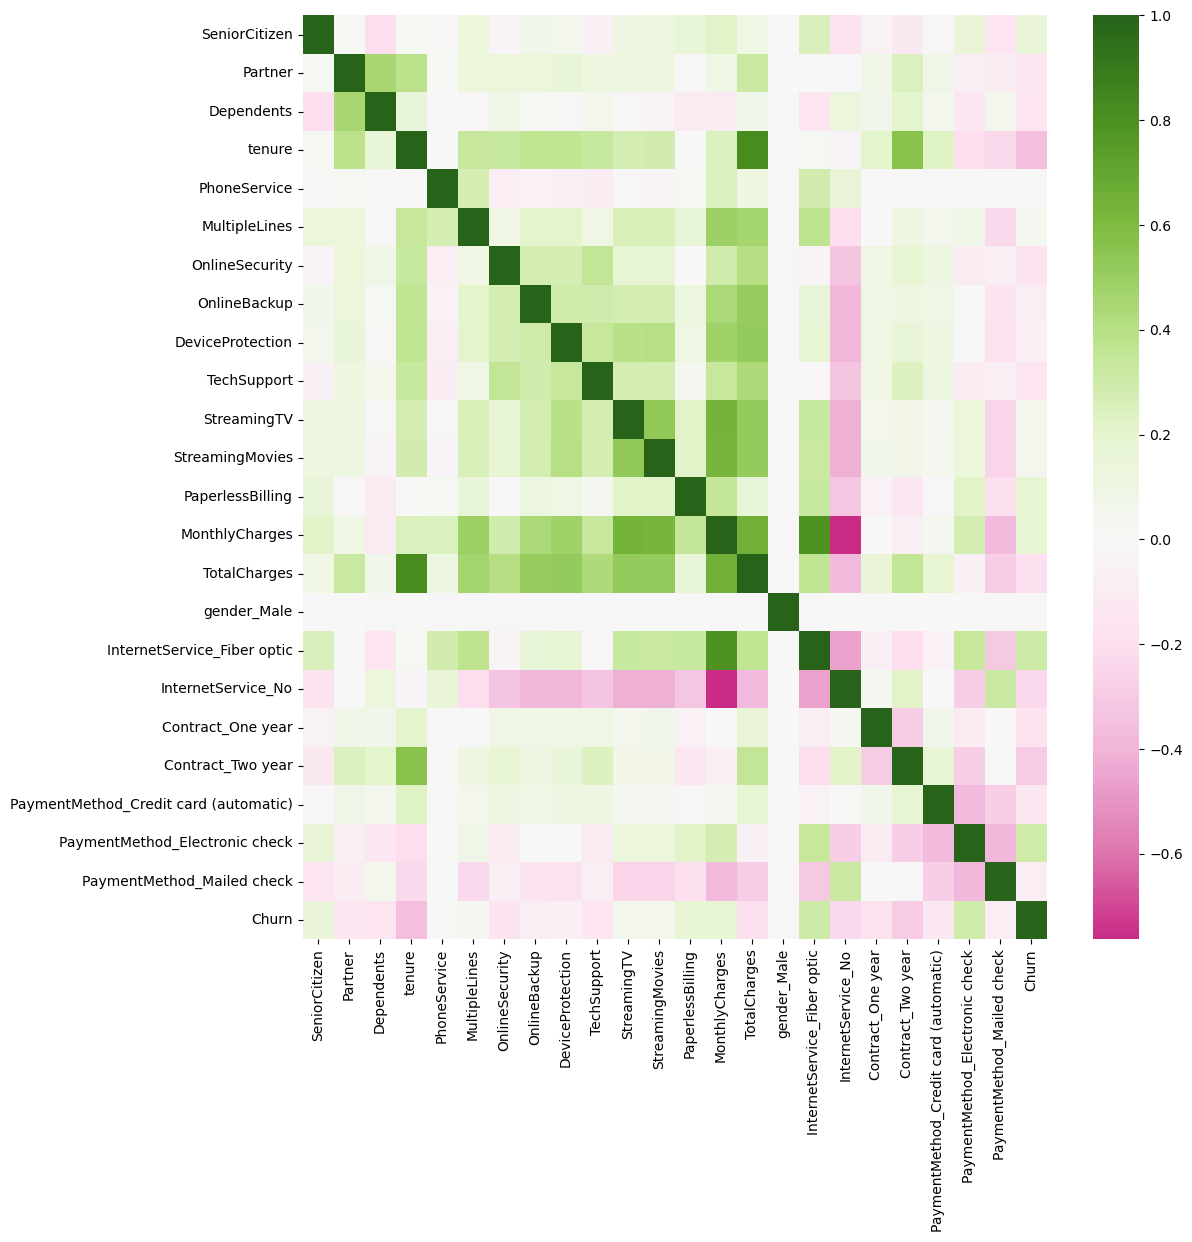

In [65]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), cmap='PiYG', center=0);

Признаки, означающие сумму ежемесячных трат и трат за всё время (MonthlyCharges, TotalCharges), сильно коррелируют с признаками, связанными с различными услугами, который клиент выбирает для подключения. Также относительно высокая корреляция у признаков tenure (длительность обслуживания) и Contract_Two year (двухгодичный контракт, самый длительный из возможных). Менее всего коррелирует с другими признаками признак, обозначающий пол клиента.

Самая высокая корреляция целевой переменной с признаком tenure.

**Подробнее посмотрим на корреляцию целевой переменной с признаками:**

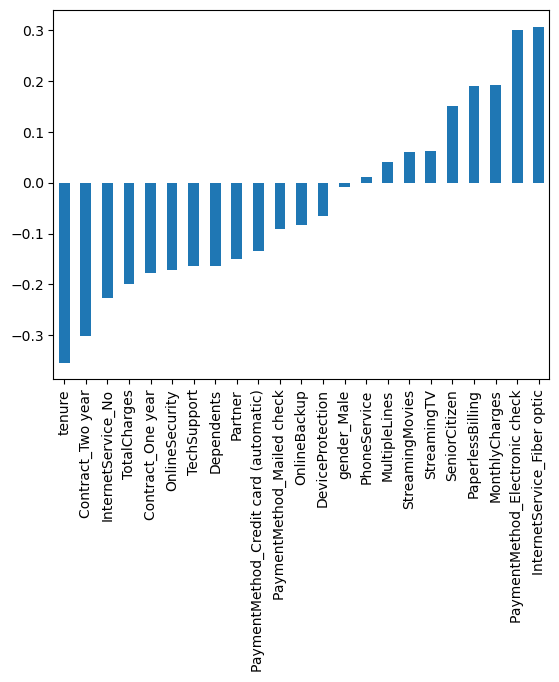

In [67]:
df.corr()['Churn'][:-1].sort_values().plot(kind='bar');

## Создание предиктивной модели

Построим следующие модели и сравним их результаты:
* логистическая регрессия
* KNN
* классификатор опорных векторов
* случайные леса
* GradientBoosting
* AdaBoostClassifier

### Разделим данные на признаки и целевую переменную, разобьем данные на обучающий и тестовый наборы, выполним масштабирование признаков

In [70]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [72]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [76]:
scaler = StandardScaler()

scaled_X_train = X_train.copy()
scaled_X_test = X_test.copy()

# масштабируем только числовые признаки
scaled_X_train[var_numeric] = scaler.fit_transform(scaled_X_train[var_numeric])
scaled_X_test[var_numeric] = scaler.transform(scaled_X_test[var_numeric])

### Логистическая регрессия

In [78]:
from sklearn.linear_model import LogisticRegression

In [80]:
log_model = LogisticRegression(max_iter=1000, class_weight='balanced')

In [82]:
param_grid_log_model = {
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
}

In [84]:
grid_log_model = GridSearchCV(log_model, param_grid_log_model)

In [86]:
grid_log_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [87]:
grid_log_model.best_estimator_

LogisticRegression(C=0.012742749857031334, class_weight='balanced',
                   max_iter=1000, solver='saga')

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

In [89]:
y_pred_log_model = grid_log_model.predict(scaled_X_test)

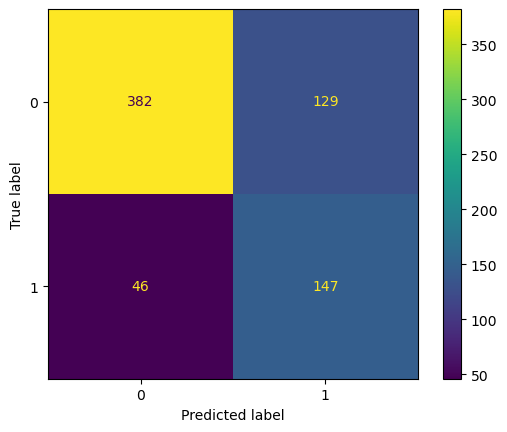

In [94]:
ConfusionMatrixDisplay.from_estimator(grid_log_model, scaled_X_test, y_test)

In [96]:
print(classification_report(y_test, y_pred_log_model))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81       511
           1       0.53      0.76      0.63       193

    accuracy                           0.75       704
   macro avg       0.71      0.75      0.72       704
weighted avg       0.79      0.75      0.76       704



### KNN

In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
knn = KNeighborsClassifier()

In [110]:
param_grid_knn = {'n_neighbors': list(range(1, 36))}

In [112]:
grid_knn = GridSearchCV(knn, param_grid_knn)

In [114]:
grid_knn.fit(scaled_X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [115]:
grid_knn.best_estimator_

KNeighborsClassifier(n_neighbors=34)

In [118]:
y_pred_knn = grid_knn.predict(scaled_X_test)

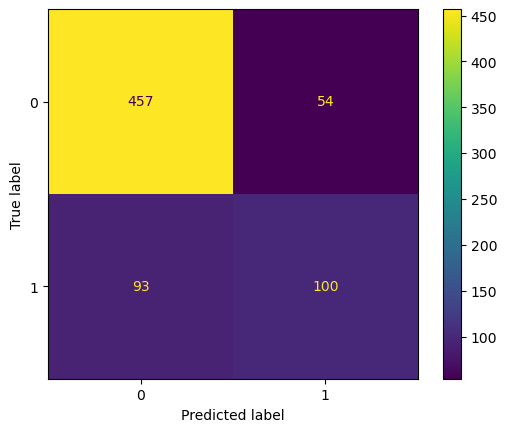

In [120]:
ConfusionMatrixDisplay.from_estimator(grid_knn, scaled_X_test, y_test)

In [122]:
print(classification_report(y_test, y_pred_log_model))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81       511
           1       0.53      0.76      0.63       193

    accuracy                           0.75       704
   macro avg       0.71      0.75      0.72       704
weighted avg       0.79      0.75      0.76       704



### Метод опорных векторов

In [124]:
from sklearn.svm import SVC

In [126]:
svc = SVC(class_weight='balanced')

In [128]:
param_grid_svc = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.001, 0.01, 0.1, 0.5, 1],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4, 5]
}

In [130]:
grid_svc = GridSearchCV(svc, param_grid_svc, verbose=10)

In [1]:
%%capture
grid_svc.fit(scaled_X_train, y_train)

NameError: name 'grid_svc' is not defined

In [133]:
grid_svc.best_estimator_

SVC(C=0.1, class_weight='balanced', degree=2, gamma='auto', kernel='poly')

In [136]:
y_pred_svc = grid_svc.predict(scaled_X_test)

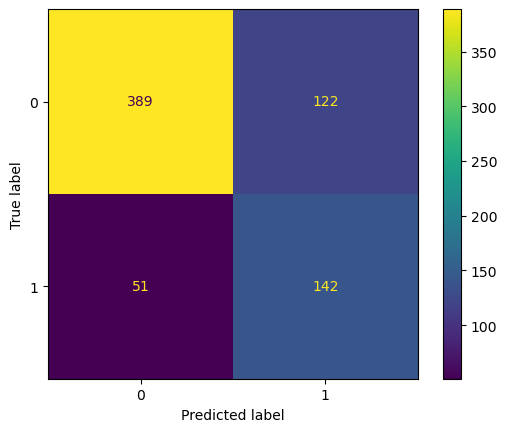

In [138]:
ConfusionMatrixDisplay.from_estimator(grid_svc, scaled_X_test, y_test)

In [140]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82       511
           1       0.54      0.74      0.62       193

    accuracy                           0.75       704
   macro avg       0.71      0.75      0.72       704
weighted avg       0.79      0.75      0.76       704



### Случайные леса

In [142]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
rfc = RandomForestClassifier(class_weight='balanced')

In [146]:
len(X.columns)

23

In [148]:
param_grid_rfc = {
    'n_estimators': [64, 100, 128],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10]
}

In [150]:
grid_rfc = GridSearchCV(rfc, param_grid_rfc, scoring='recall', verbose=10)

In [152]:
grid_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START max_depth=4, max_features=sqrt, n_estimators=64............
[CV 1/5; 1/24] END max_depth=4, max_features=sqrt, n_estimators=64;, score=0.791 total time=   0.4s
[CV 2/5; 1/24] START max_depth=4, max_features=sqrt, n_estimators=64............
[CV 2/5; 1/24] END max_depth=4, max_features=sqrt, n_estimators=64;, score=0.773 total time=   0.2s
[CV 3/5; 1/24] START max_depth=4, max_features=sqrt, n_estimators=64............
[CV 3/5; 1/24] END max_depth=4, max_features=sqrt, n_estimators=64;, score=0.795 total time=   0.1s
[CV 4/5; 1/24] START max_depth=4, max_features=sqrt, n_estimators=64............
[CV 4/5; 1/24] END max_depth=4, max_features=sqrt, n_estimators=64;, score=0.779 total time=   0.1s
[CV 5/5; 1/24] START max_depth=4, max_features=sqrt, n_estimators=64............
[CV 5/5; 1/24] END max_depth=4, max_features=sqrt, n_estimators=64;, score=0.803 total time=   0.1s
[CV 1/5; 2/24] START max_depth=4,

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [64, 100, 128]},
             scoring='recall', verbose=10)

In [153]:
grid_rfc.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       max_features='log2', n_estimators=128)

In [156]:
y_pred_rfc = grid_rfc.predict(X_test)

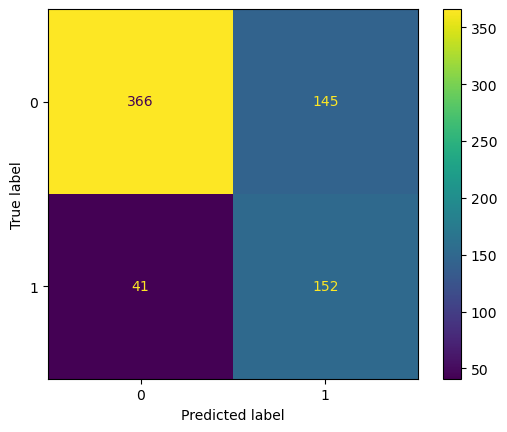

In [158]:
ConfusionMatrixDisplay.from_estimator(grid_rfc, X_test, y_test)

In [160]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       511
           1       0.51      0.79      0.62       193

    accuracy                           0.74       704
   macro avg       0.71      0.75      0.71       704
weighted avg       0.79      0.74      0.75       704



In [162]:
grid_rfc_2 = GridSearchCV(rfc, param_grid_rfc, verbose=10)
grid_rfc_2.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START max_depth=4, max_features=sqrt, n_estimators=64............
[CV 1/5; 1/24] END max_depth=4, max_features=sqrt, n_estimators=64;, score=0.734 total time=   0.1s
[CV 2/5; 1/24] START max_depth=4, max_features=sqrt, n_estimators=64............
[CV 2/5; 1/24] END max_depth=4, max_features=sqrt, n_estimators=64;, score=0.776 total time=   0.2s
[CV 3/5; 1/24] START max_depth=4, max_features=sqrt, n_estimators=64............
[CV 3/5; 1/24] END max_depth=4, max_features=sqrt, n_estimators=64;, score=0.739 total time=   0.2s
[CV 4/5; 1/24] START max_depth=4, max_features=sqrt, n_estimators=64............
[CV 4/5; 1/24] END max_depth=4, max_features=sqrt, n_estimators=64;, score=0.765 total time=   0.1s
[CV 5/5; 1/24] START max_depth=4, max_features=sqrt, n_estimators=64............
[CV 5/5; 1/24] END max_depth=4, max_features=sqrt, n_estimators=64;, score=0.762 total time=   0.1s
[CV 1/5; 2/24] START max_depth=4,

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [64, 100, 128]},
             verbose=10)

In [170]:
y_pred_rfc_2 = grid_rfc_2.predict(X_test)

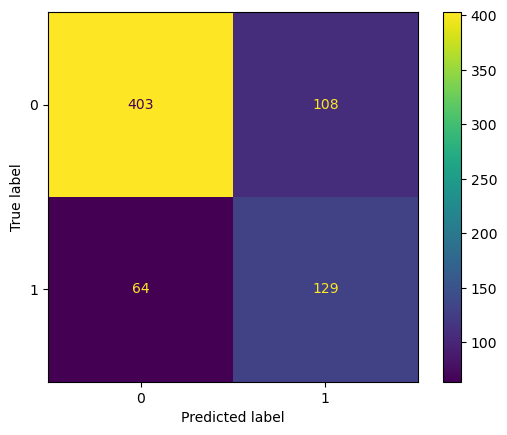

In [172]:
ConfusionMatrixDisplay.from_estimator(grid_rfc_2, X_test, y_test)

In [174]:
print(classification_report(y_test, y_pred_rfc_2))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       511
           1       0.54      0.67      0.60       193

    accuracy                           0.76       704
   macro avg       0.70      0.73      0.71       704
weighted avg       0.78      0.76      0.76       704



Для случайного леса сделали 2 поиска по сетке: в первом случае указали, чтобы лучшие параметры подбирались для метрики recall (полнота), ведь в нашей задаче очень важно минимизировать ложно-отрицательные результаты для класса 1 (ушедшие в отток), то есть нужно повысить полноту. Так мы действительно можем повысить метрику recall для класса клиентов, ушедших в отток (1 класс), однако общие результаты чуть хуже.

### Boosted trees

In [177]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

#### AdaBoost

In [179]:
ada_model = AdaBoostClassifier()

In [209]:
ada_model.fit(X_train, y_train)

C:\Users\ч\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [211]:
y_pred_ada = ada_model.predict(X_test)

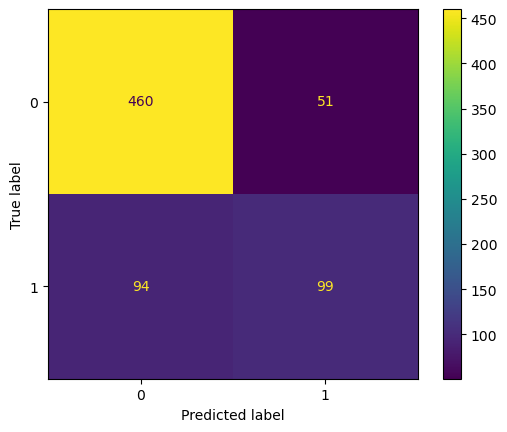

In [213]:
ConfusionMatrixDisplay.from_estimator(ada_model, X_test, y_test)

In [215]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       511
           1       0.66      0.51      0.58       193

    accuracy                           0.79       704
   macro avg       0.75      0.71      0.72       704
weighted avg       0.78      0.79      0.79       704



Случайный лес справился лучше: несмотря на то, что в адаптивном бустинге метрика accuracy выше, а также точность определения класса 1 лучше, 
в случайном лесе выше полнота (что для нас важно) и f1-мера для класса 1.

#### GradientBoosting

In [223]:
gb_model = GradientBoostingClassifier()

In [225]:
param_grid_gb = {
    'n_estimators': [40, 64, 100, 128],
    'max_depth':[3, 4, 6, 8, 10]
}

In [227]:
grid_gb = GridSearchCV(gb_model, param_grid_gb, verbose=10)

In [229]:
grid_gb.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START max_depth=3, n_estimators=40...............................
[CV 1/5; 1/20] END max_depth=3, n_estimators=40;, score=0.792 total time=   0.3s
[CV 2/5; 1/20] START max_depth=3, n_estimators=40...............................
[CV 2/5; 1/20] END max_depth=3, n_estimators=40;, score=0.802 total time=   0.3s
[CV 3/5; 1/20] START max_depth=3, n_estimators=40...............................
[CV 3/5; 1/20] END max_depth=3, n_estimators=40;, score=0.795 total time=   0.3s
[CV 4/5; 1/20] START max_depth=3, n_estimators=40...............................
[CV 4/5; 1/20] END max_depth=3, n_estimators=40;, score=0.805 total time=   0.3s
[CV 5/5; 1/20] START max_depth=3, n_estimators=40...............................
[CV 5/5; 1/20] END max_depth=3, n_estimators=40;, score=0.815 total time=   0.3s
[CV 1/5; 2/20] START max_depth=3, n_estimators=64...............................
[CV 1/5; 2/20] END max_depth=3, n_estimators=64

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 6, 8, 10],
                         'n_estimators': [40, 64, 100, 128]},
             verbose=10)

In [230]:
grid_gb.best_estimator_

GradientBoostingClassifier(max_depth=4, n_estimators=64)

In [231]:
y_pred_gb = grid_gb.predict(X_test)

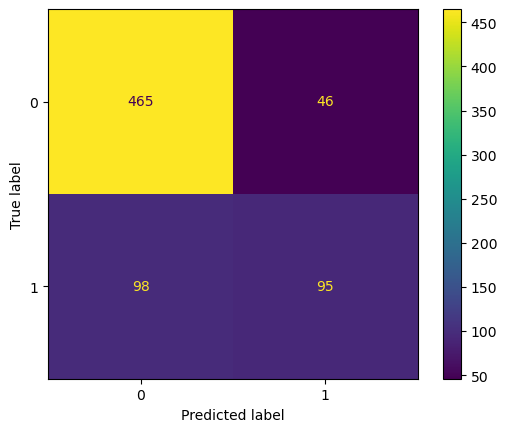

In [232]:
ConfusionMatrixDisplay.from_estimator(grid_gb, X_test, y_test)

In [233]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       511
           1       0.67      0.49      0.57       193

    accuracy                           0.80       704
   macro avg       0.75      0.70      0.72       704
weighted avg       0.78      0.80      0.78       704



### Вывод по моделям

Построенные модели показывают схожие результаты, но все они недостаточно хорошо предсказывают класс 1 (клиентов, ушедших в отток). Это может быть связано с тем, что в данных значительно больше объектов класса 0, чем класса 1. Поэтому, несмотря на то, что некоторые модели достигли accuracy 79–80%, при выборе модели лучше ориентироваться на recall (если важно не упустить клиентов в оттоке) или F1-score для класса 1.

Если приоритет — высокая полнота, стоит выбрать модель случайного леса (grid_rfc.best_estimator_). Если ориентироваться на наилучшее значение F1-score (для класса 1), хорошими кандидатами являются модели логистической регрессии, KNN, SVM и случайного леса.

Для окончательного выбора модели стоит дополнительно провести кросс-валидацию на лучших гиперпараметрах, чтобы убедиться, что результаты не зависят от случайного разбиения данных.

---

А ниже посмотрим на важность признаков для модели grid_rfc.best_estimator_, которая показала лучшее значение recall и хорошее значение f1-меры.

In [259]:
important_feat = pd.DataFrame(data=grid_rfc.best_estimator_.feature_importances_, index=X.columns, columns=['Важность признаков']).sort_values('Важность признаков')
important_feat

,Важность признаков
gender_Male,0.000899
PaymentMethod_Mailed check,0.002037
DeviceProtection,0.002198
MultipleLines,0.002244
PhoneService,0.002501
StreamingTV,0.002661
OnlineBackup,0.003971
PaymentMethod_Credit card (automatic),0.004682
StreamingMovies,0.005286
SeniorCitizen,0.007128


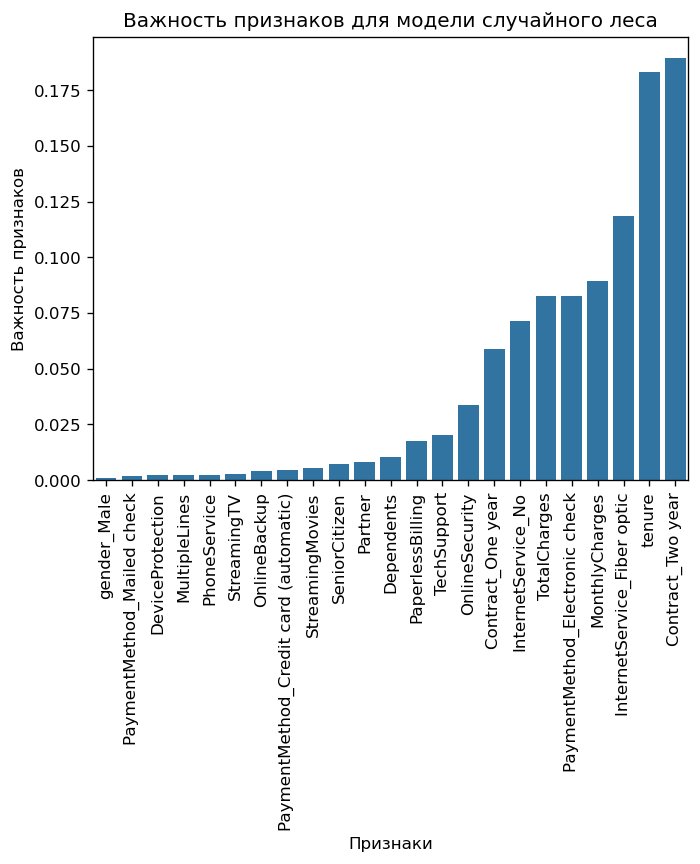

In [269]:
plt.figure(dpi=120)
sns.barplot(data=important_feat, x=important_feat.index, y='Важность признаков')
plt.title('Важность признаков для модели случайного леса')
plt.xlabel('Признаки')
plt.xticks(rotation=90);

Как уже отмечалось, срок контракта действительно играет важную роль в анализе оттока: клиенты с более длительными контрактами реже уходят к конкурентам. Также значимыми признаками являются длительность обслуживания (tenure), общие траты (TotalCharges) и ежемесячные платежи (MonthlyCharges).

Интересно, что одним из важных факторов оказался признак 'InternetService_Fiber Optic'. Для более глубокого понимания причин оттока стоит детальнее исследовать этот аспект.